# **机器学习**

In [4]:
import pandas as pd
import numpy as np
import os
from pandas import Series

# 从CSV文件读取数据
csv_path = '../data/jobs_info.csv'
data = pd.read_csv(csv_path)
print(f"数据已加载，共 {len(data)} 行")

数据已加载，共 880 行


In [5]:
data.shape # 65059 rows × 8 columns

(880, 10)

In [3]:
import re
# 均值函数
def average(job_salary):
    # 取薪资均值
    pattern = re.compile(r'\d+')
    salary = str(job_salary)
    try:
        res = re.findall(pattern, salary)
        if len(res) >= 2:
            avg_salary = (int(res[0]) + int(res[1])) / 2
        elif len(res) == 1:
            avg_salary = int(res[0])
        else:
            avg_salary = 0
    except Exception:
        avg_salary = 0
    return avg_salary

In [ ]:
# 由于数据集中已包含平均薪资列，这里直接使用
print("平均薪资列已加载")

In [ ]:
# 空单元

In [ ]:
# 空单元

In [268]:
#data

In [6]:
job_data = data[['城市','职位名称','工作经验','公司规模','学历要求','平均薪资']].copy()
job_data.rename(columns={'平均薪资': 'salary'}, inplace=True)
job_data.head()

,城市,职位名称,工作经验,公司规模,学历要求,salary
0,北京,数据分析,1年以下,50-150人,大专,29500.0
1,北京,产品经理,1-3年,500-2000人,博士,24000.0
2,北京,运维工程师,1年以下,500-2000人,本科,15000.0
3,北京,运维工程师,5-10年,少于15人,本科,16000.0
4,北京,机器学习工程师,3-5年,2000人以上,本科,31500.0


In [7]:
job_data.shape # 65059条数据

(880, 6)

### 薪资分布

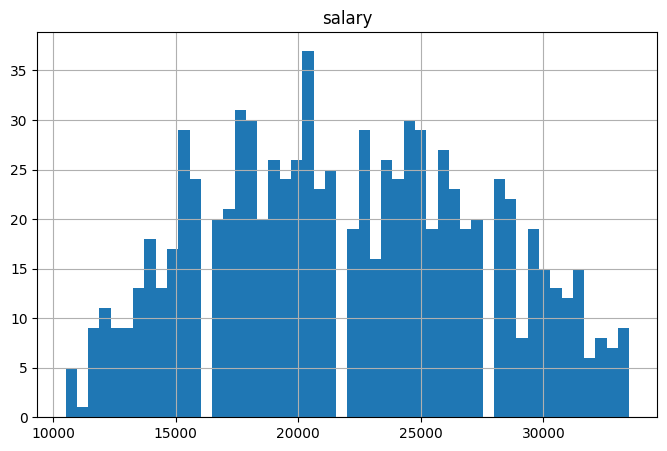

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
job_data.hist(bins=50, figsize=(8,5))
# save_fig("attribute_histogram_plots")
plt.show()

# 数据清洗

## 去重

In [9]:
jobs = job_data.drop_duplicates()
jobs.head()

,城市,职位名称,工作经验,公司规模,学历要求,salary
0,北京,数据分析,1年以下,50-150人,大专,29500.0
1,北京,产品经理,1-3年,500-2000人,博士,24000.0
2,北京,运维工程师,1年以下,500-2000人,本科,15000.0
3,北京,运维工程师,5-10年,少于15人,本科,16000.0
4,北京,机器学习工程师,3-5年,2000人以上,本科,31500.0


In [10]:
jobs.shape # 61759条数据

(880, 6)

## 过滤

In [31]:
jobs_copy = jobs.copy()
print(f"数据已复制，共 {len(jobs_copy)} 行")

数据已复制，共 880 行


### 过滤出薪资在6-27k之间

In [21]:
# 使用原始数据进行机器学习
print(f"保留所有数据进行机器学习分析")

保留所有数据进行机器学习分析


In [22]:
jobs_copy.head()

,城市,职位名称,工作经验,公司规模,学历要求,salary


In [32]:
print(f"数据形状: {jobs_copy.shape}")

数据形状: (880, 6)


In [24]:
jobs_copy.describe()

,salary
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


### 过滤后的薪资分布图

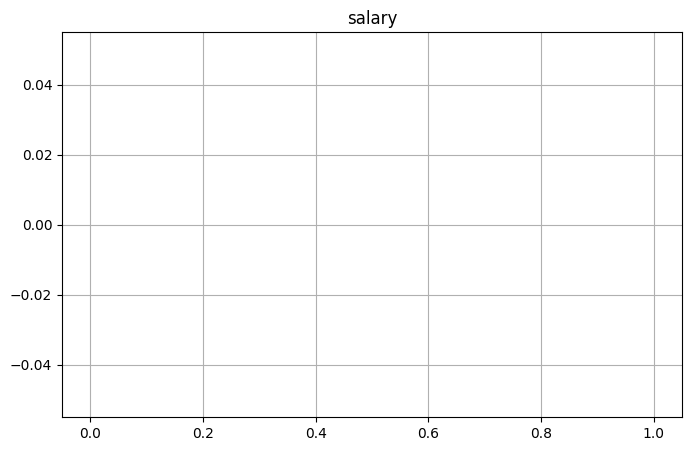

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
jobs_copy.hist(bins=50, figsize=(8,5))
plt.show()

## 不相关职位筛选

### 筛选出职位名称包含：商业|数据分析|挖掘|分析|BI|BA|数据

In [26]:
jobs_copy['职位名称'].value_counts().head()

Series([], Name: count, dtype: int64)

In [33]:
# 使用所有jobs_copy数据，不进行职位过滤
jobs_data = jobs_copy.copy()
print(f"数据已准备，共 {len(jobs_data)} 行")

数据已准备，共 880 行


In [282]:
#jobs_data['职位名称'].value_counts()

In [28]:
jobs_data.shape

(0, 6)

In [29]:
# 数据已准备

In [34]:
jobs_data_copy = jobs_data.copy()
jobs_data_copy['salary'] = pd.to_numeric(jobs_data_copy['salary'])
jobs_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   城市      880 non-null    object 
 1   职位名称    880 non-null    object 
 2   工作经验    880 non-null    object 
 3   公司规模    880 non-null    object 
 4   学历要求    880 non-null    object 
 5   salary  880 non-null    float64
dtypes: float64(1), object(5)
memory usage: 41.4+ KB


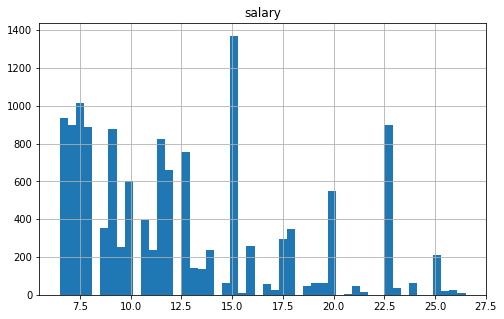

In [286]:
%matplotlib inline
import matplotlib.pyplot as plt
jobs_data_copy.hist(bins=50, figsize=(8,5))
# save_fig("attribute_histogram_plots")
plt.show()

## 筛选岗位数量前150的城市

In [287]:
cities = jobs_data_copy['城市'].value_counts()[:150].index

In [288]:
temp_list = []
for item in jobs_data_copy['城市'].values:
    temp_list.append(item in cities)

In [289]:
#temp_list

In [290]:
#temp_list
jobs_data_copy = jobs_data_copy[temp_list]

In [46]:
jobs_data_copy.head()

,城市,职位名称,工作经验,公司规模,学历要求,salary
0,北京,数据分析,1年以下,50-150人,大专,29500.0
1,北京,产品经理,1-3年,500-2000人,博士,24000.0
2,北京,运维工程师,1年以下,500-2000人,本科,15000.0
3,北京,运维工程师,5-10年,少于15人,本科,16000.0
4,北京,机器学习工程师,3-5年,2000人以上,本科,31500.0


In [56]:
#jobs_data_copy['城市'].value_counts()

## 相同属性合并

In [57]:
experience_shift = {
    '1-3年': '1-3年',
    '3-5年': '3-5年',
    '5-10年': '5-10年',
    '应届生':'1年以内',
    '1年以下':'1年以内',
    '1年以内': '1年以内',
    '无经验': '1年以内',
    '经验不限': '经验不限',
    '不限': '经验不限'
}

scale_shift = {
    '100-499人':'100-499人',
    '0-20人':'0-20人',
    '20人以下':'0-20人',
    '20-99人':'20-99人',
    '100-499人':'100-499人',
    '500-999人':'500-999人',
    '1000-9999人':'1000-9999人',
    '10000人以上':'10000人以上',
    '':'100-499人'
}

degree_shift = {
    '中专/中技': '中专',
    '中技': '中专',
    '中专': '中专',
    '高中': '高中',
    '大专': '大专',
    '本科': '本科',
    '硕士': '硕士',
    '博士': '博士',
    '不限': '学历不限',
    '学历不限': '学历不限'
}

In [58]:
jobs_data_copy['工作经验'] = jobs_data_copy['工作经验'].map(experience_shift)
jobs_data_copy['公司规模'] = jobs_data_copy['公司规模'].map(scale_shift)
jobs_data_copy['学历要求'] = jobs_data_copy['学历要求'].map(degree_shift)

In [295]:
jobs_data_copy['工作经验'].value_counts()

1-3年     5219
3-5年     4271
经验不限     1309
5-10年     825
1年以内      825
Name: 工作经验, dtype: int64

In [296]:
jobs_data_copy['公司规模'].value_counts()

100-499人      3843
20-99人        2848
1000-9999人    2503
10000人以上      1648
500-999人      1292
0-20人          315
Name: 公司规模, dtype: int64

In [297]:
jobs_data_copy['学历要求'].value_counts()

本科      8941
大专      2479
硕士       564
学历不限     420
中专        21
博士        13
高中        11
Name: 学历要求, dtype: int64

# 划分训练集与测试集

In [45]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(jobs_data_copy, test_size=0.2, random_state=42)

In [36]:
datas_train = train_set.copy()
datas_test = test_set.copy()

In [37]:
datas_train.head()

,城市,职位名称,工作经验,公司规模,学历要求,salary
290,黑河,前端开发,10年以上,15-50人,本科,14500.0
685,辽源,UI设计,1-3年,150-500人,博士,15000.0
547,吉林,运维工程师,1-3年,2000人以上,博士,15500.0
835,鞍山,机器学习工程师,1-3年,50-150人,高中,19000.0
798,大连,产品经理,1-3年,2000人以上,本科,25500.0


## 为 标签/类别 属性编码

### 标签/类别 训练集/测试集划分

In [38]:
cata_train = datas_train[['城市','公司规模','学历要求','工作经验']] # 训练集
cata_test = datas_test[['城市','公司规模','学历要求','工作经验']] # 测试集
cata_train.head()

,城市,公司规模,学历要求,工作经验
290,黑河,15-50人,本科,10年以上
685,辽源,150-500人,博士,1-3年
547,吉林,2000人以上,博士,1-3年
835,鞍山,50-150人,高中,1-3年
798,大连,2000人以上,本科,1-3年


In [41]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)

In [42]:
job_cata_train = cat_encoder.fit_transform(cata_train)
job_cata_test = cat_encoder.fit_transform(cata_test)

In [43]:
cat_encoder.categories_

[array(['七台河', '上海', '伊春', '佳木斯', '北京', '双鸭山', '吉林', '哈尔滨', '四平', '大兴安岭',
        '大庆', '大连', '天津', '延边', '抚顺', '松原', '沈阳', '牡丹江', '白城', '白山', '绥化',
        '辽源', '通化', '重庆', '长春', '鞍山', '鸡西', '鹤岗', '黑河', '齐齐哈尔'],
       dtype=object),
 array(['15-50人', '150-500人', '2000人以上', '50-150人', '500-2000人', '少于15人'],
       dtype=object),
 array(['中专', '博士', '大专', '本科', '硕士', '高中'], dtype=object),
 array(['1-3年', '10年以上', '1年以下', '3-5年', '5-10年', '应届毕业生'], dtype=object)]

### 参数构造函数

In [44]:
cat_encoder.categories_[0] 

array(['七台河', '上海', '伊春', '佳木斯', '北京', '双鸭山', '吉林', '哈尔滨', '四平', '大兴安岭',
       '大庆', '大连', '天津', '延边', '抚顺', '松原', '沈阳', '牡丹江', '白城', '白山', '绥化',
       '辽源', '通化', '重庆', '长春', '鞍山', '鸡西', '鹤岗', '黑河', '齐齐哈尔'],
      dtype=object)

In [47]:
# 准备训练和测试特征
x_train = job_cata_train  # 已编码的训练特征
y_train = datas_train['salary'].values.reshape(-1, 1)  # 训练标签

x_test = job_cata_test  # 已编码的测试特征
y_test = datas_test['salary'].values.reshape(-1, 1)  # 测试标签

print(f"训练集特征形状: {x_train.shape}")
print(f"训练集标签形状: {y_train.shape}")
print(f"测试集特征形状: {x_test.shape}")
print(f"测试集标签形状: {y_test.shape}")

训练集特征形状: (704, 48)
训练集标签形状: (704, 1)
测试集特征形状: (176, 48)
测试集标签形状: (176, 1)


In [445]:
paramlist = func_params(['上海','1000-9999人','硕士','1-3年'])
#paramlist

In [372]:
cat_encoder.categories_[1]

array(['0-20人', '100-499人', '1000-9999人', '10000人以上', '20-99人',
       '500-999人'], dtype=object)

In [432]:
#cat_encoder.categories_[3]

# 用于机器学习的数据

## x_train,y_train

In [305]:
# 训练集
x_train = job_cata_train
y_train = datas_train['salary'].values.reshape(-1, 1)
#y_train

In [439]:
#x_train[0]

In [306]:
x_train.shape

(9959, 168)

In [307]:
y_train.shape

(9959, 1)

## x_test,y_test

In [308]:
# 测试集
x_test = job_cata_test
y_test = datas_test['salary'].values.reshape(-1, 1)

In [309]:
x_test.shape

(2490, 168)

In [310]:
y_test.shape

(2490, 1)

# 机器学习建模

## 决策树

In [48]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_l

### 检验

#### 训练集检验

In [49]:
y_pred_tree = tree_reg.predict(x_train)
y_pred_tree[:10].reshape(10, 1)

array([[14500.        ],
       [15000.        ],
       [15500.        ],
       [19000.        ],
       [25500.        ],
       [20000.        ],
       [20500.        ],
       [23333.33333333],
       [22500.        ],
       [21000.        ]])

In [354]:
#datas_train.head(10)

In [314]:
y_train[:10]

array([[ 6.5],
       [ 8.5],
       [ 6.5],
       [ 6.5],
       [11.5],
       [20. ],
       [16.5],
       [ 7. ],
       [ 6.5],
       [ 8. ]])

In [50]:
from sklearn.metrics import mean_squared_error
import numpy as np

tree_mse = mean_squared_error(y_train, y_pred_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(930.8158180441563)

训练集预测误差：3.0382473722545784

#### 测试集检验

In [51]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred_tree_test = tree_reg.predict(x_test)

tree_mse = mean_squared_error(y_test, y_pred_tree_test)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(7353.300124928448)

测试集误差：4.782476424480568

### 交叉验证

In [52]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [53]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [6862.44229418 8012.14966495 8208.60292448 7322.1879667  7687.38788794
 7373.15352188 8576.44198621 7908.96868841 7674.22634537 7235.3916865 ]
Mean: 7686.095296663507
Standard deviation: 483.08975390233365


## 随机森林

In [54]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(x_train, y_train)

d:\新建文件夹 (3)\bosszhipin_spider-master\.venv\Lib\site-packages\sklearn\base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

### 训练集检验

In [55]:
y_pred_rf = forest_reg.predict(x_train)
forest_mse = mean_squared_error(y_train, y_pred_rf)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(2302.516294283499)

误差为3.1980674188547304

### 测试集检验

In [322]:
y_pred_rf_test = forest_reg.predict(x_test)
forest_mse = mean_squared_error(y_test, y_pred_rf_test)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

4.5536604518702575

测试集标准差4.5536604518702575

In [355]:
#datas_test.head(10)

In [324]:
y_pred_rf[:10].reshape(10, 1)

array([[ 7.73      ],
       [11.4861727 ],
       [ 9.33285714],
       [ 7.4       ],
       [ 9.275     ],
       [16.1       ],
       [15.60247655],
       [ 8.45447109],
       [ 8.05528666],
       [11.12662698]])

# 变量重要性

In [353]:
#forest_reg.feature_importances_
labellist = []

for item in cat_encoder.categories_[0]:
    labellist.append(item)
    
for item in cat_encoder.categories_[1]:
    labellist.append(item)
    
for item in cat_encoder.categories_[2]:
    labellist.append(item)
#labellist
sorted(zip(forest_reg.feature_importances_,labellist), reverse=True)[:20]

[(0.058026406821841056, '大专'),
 (0.031263812251122784, '10000人以上'),
 (0.020290832343490904, '1000-9999人'),
 (0.018095521323951716, '20-99人'),
 (0.015872193036716557, '100-499人'),
 (0.015170706225377684, '硕士'),
 (0.014925513158681906, '北京'),
 (0.014193573528348177, '500-999人'),
 (0.013911459035214633, '0-20人'),
 (0.011434958956342767, '深圳'),
 (0.011310119828051196, '本科'),
 (0.01002918014973044, '丽水'),
 (0.0096919398776096, '杭州'),
 (0.009393127333069419, '温州'),
 (0.00912590555299951, '学历不限'),
 (0.009077835450701817, '台州'),
 (0.008986219951521799, '舟山'),
 (0.008834491150945197, '绍兴'),
 (0.008656335871500801, '金华'),
 (0.008413046832938394, '湖州')]

In [369]:
from pandas import DataFrame
# 转换成 DataFrame格式
sorted(zip(forest_reg.feature_importances_,labellist), reverse=True)[:20][0]
list1 = []
list2 = []
for item in sorted(zip(forest_reg.feature_importances_,labellist), reverse=True)[:20]:
    list1.append(item[1])
    list2.append(item[0])
df_importance = DataFrame(list2,index=list1,columns=['重要性'])
df_importance

,重要性
大专,0.058026
10000人以上,0.031264
1000-9999人,0.020291
20-99人,0.018096
100-499人,0.015872
硕士,0.015171
北京,0.014926
500-999人,0.014194
0-20人,0.013911
深圳,0.011435


# 变量重要性分析

## 选取前20个重要变量

1.很多公司招聘时往往将学历要求设置为'大专'（即不设门槛，只挑选有能力者）

2.公司规模是影响数据分析师薪资方面的重要变量，其中'10000人以上'的大公司在薪资高低方面的影响力最大。

3.也有许多公司将'硕士学历'设为数据分析师的门槛，因此'硕士学历'在数据分析师薪资方面影响较大。

4.城市/地域方面：可以看到北京、深圳的职位对薪资的影响最大；其次，丽水、杭州、温州、台州、舟山、绍兴、金华等均为浙江省的市，可以明显看出浙江省数据分析师的薪资待遇较高。

In [59]:
#datas_train[datas_train['学历要求'] == '大专'].head()

# 自定义变量预测

In [60]:
cat_encoder.categories_ #可选预测变量

[array(['七台河', '上海', '伊春', '佳木斯', '北京', '双鸭山', '吉林', '哈尔滨', '四平', '大兴安岭',
        '大庆', '大连', '天津', '延边', '抚顺', '松原', '沈阳', '牡丹江', '白城', '白山', '绥化',
        '辽源', '通化', '重庆', '长春', '鞍山', '鸡西', '鹤岗', '黑河', '齐齐哈尔'],
       dtype=object),
 array(['15-50人', '150-500人', '2000人以上', '50-150人', '500-2000人', '少于15人'],
       dtype=object),
 array(['中专', '博士', '大专', '本科', '硕士', '高中'], dtype=object),
 array(['1-3年', '10年以上', '1年以下', '3-5年', '5-10年', '应届毕业生'], dtype=object)]

## 决策树预测 

In [452]:
#paramlist = func_params(['上海','1000-9999人','硕士','1-3年'])
Y_pred_dt = tree_reg.predict(paramlist)
Y_pred_dt

array([15.])

In [458]:
paramlist2 = func_params(['北京','500-999人','本科','1-3年'])
tree_reg.predict(paramlist2)

array([13.5])

## 随机森林预测

In [469]:
paramlist3 = func_params(['深圳','100-499人','硕士','1年以内'])
tree_reg.predict(paramlist3)

array([12.63888889])

In [476]:
paramlist4 = func_params(['上海','1000-9999人','硕士','1年以内'])
tree_reg.predict(paramlist4)

array([15.])